#**Exploratory Data Analysis Churn Analysis**
https://www.kaggle.com/datasets/blastchar/telco-customer-churn 

#Import Libraries & Data
Import Libraries to help the programming and analysis process. 

In [ ]:
#importing libraries
import warnings
warnings.filterwarnings("ignore") #for ignore not important warnings
import numpy as np #for saintific process
import pandas as pd #for dataframe processing
import seaborn as sns #for data visualitation
import matplotlib.pyplot as plt #for data visualitation
import io #for reading file

#for importing Data
from google.colab import files #for uploading file
pd.set_option('display.max_columns', 50) #for Pandas show all column
uploaded= files.upload() #for uploaded data
df=pd.read_csv(io.BytesIO(uploaded['dataset.csv'])) #for read data as csv

Saving dataset.csv to dataset.csv


#Data Understanding
Data Understanding  is process that use to understand data content, know data quality, and find early insigth from data. Data Understanding process can do with some step consist of:
- Identification dataframe
- Handling dataframe
- Statistical Summary
- Data Visualitation 


## 1.Dataframe Identification

There are some variabels in dataset that is:
- CustomerID: A unique ID that identifies each customer.
- Gender: The customer’s gender: Male, Female
- Senior Citizen: Indicates if the customer is 65 or older: Yes, No
- Partners: Indicates if the customer is married: Yes, No
- Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
- Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: (Yes, No, No phone service)
- Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: (Yes, No, No internet service)
- Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: (Yes, No, No internet service)
- Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: (Yes, No, No internet service)
- Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: (Yes, No, No internet service)
- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: (Yes, No, No internet service)
- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: (Yes, No, No internet service)
- Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
- Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
- Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company.

---
The target variable in this dataset problem is the Churn Variable. Where the data understanding process is carried out to find out various information related to Churn variables starting from statistical summaries, distribution based on certain categories, to variables that affect Churn customers.

In [ ]:
# show 5 rows dataframe to know early data content
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#show columns to know all variabel in dataframe
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#show shape
df.shape

(7043, 21)

In [ ]:
#show dataframe information to know data type every variabels, check for null value, and identify if other problems from dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on the output above, it is known that the dataframe consists of 21 columns or variables. There are 2 variables of type integer, 1 variable of type float, and the other is of type object. It is known that there is no Missing Value in the dataframe because the total value of each variable is the same as the number of RangeIndex in the dataframe.

However, there are some oddities in the data information.
1. Based on data info, the `SeniorCitizen` variable has an integer data type. In fact, based on the explanation of the dataframe, the SeniorCitizen variable is a variable that shows the customer category based on age (yes=senior 65 years or above/no=under 65 years) which should be of the object data type. When viewed from the dataframe, this occurs because the data value written on the dataframe is in the form of a numeric category (1/0). Therefore, it is necessary to change the data type from integer to object.

2. Based on data info, the `TotalCharges` variable has an object data type. In fact, based on the explanation of the dataframe, the TotalCharges variable is a variable that shows the costs incurred each quarter which should be of the float data type. Therefore, it is necessary to change the data type from object to float.

3. Apart from the errors above, the `customerID` variable is actually a variable that is not needed in the analysis because it only shows the customer ID. So, you can delete the customerID variable so that the variables/columns displayed are the ones that are really needed for analysis only.



## 2.Cleaning & Handling Dataframe
Based on the identification of the data that has been done, cleaning and data handling are carried out in the form of:
- Removed the `customerID` column
- Changed the data type of the `SeniorCitizen` column to an object
- Changed the `TotalCharges` data type to float

###Remove the CustomerID Column


can be done using the code:
`dataframename.drop(columns=['columnname'])` or `dataframename.drop('columnname', axis=1)`

In [ ]:
#drop irrelevant columns
df=df.drop(columns=['customerID'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Based on the output above, there is no `customerID` column in the dataframe anymore.

### Change the data type of the SeniorCitizen into Category

can be done using the code: `dataframename['columnname']=dataframename['columnname'].astype('object')`

In [ ]:
#convert seniorcitizen into category
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Based on the output above, data type of the `SeniorCitizen` has become object.

### Change the data type of the TotalCharges into Numeric (Float)



can be done using the code: `dataframename['columnname']=dataframename['columnname'].astype('float')`.
But, the result there is an error indicating that 'cannot convert string data to float' which means that there is an empty data value in the TotalCharges variable/column. In fact, the previous data information did not show a Missing Value in each data variable. This might happen because there is a data value written " ". Thus, no Missing Value is detected. This can be confirmed by displaying the data value " " in the TotalCharges variable.

In [ ]:
#show null value in TotalCharges
df[df.TotalCharges==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Based on the output above, it is known that there are Null Value in `TotalCharges` variabel. If you pay attention again, the null value is caused by the value on the `tenure` variable being 0. 0 value on the `tenure` variable indicates unfavorable data. This can be caused by data input errors or others. So that, in this analysis there are no errors or inaccuracies in the analysis due to unclear data, the row deletion method can be carried out at the Missing Value handling step.

In [ ]:
#show null value in TotalCharges count
df[df.TotalCharges==' '].count()

gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
dtype: int64

There are 11 null value in `TotalCharges`. So, convert TotalCharges to Float can ber done using the code: 

`dataframename['columnname'] = dataframename['columnname'].apply(lambda x: np.nan if x == ' ' else float(x))` or `dataframename['columnname']=pd.to_numeric(dataframename['columnname'],errors="coerce")`

In [ ]:
# convert TotalCharges to float
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else float(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Based on the output above, data type of the `TotalCharges` has become float. And now, there are Missing Value on the `TotalCharges` Variabel.

### Missing Value Handling

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Based on the output above, it is known that there are 11 Missing Value on the `TotalCharges` variabel. So, Missing Value Handling is needed on the TotalCharges variabel.

Missing Value Handling is carried out using the filling method because filling method aims not to eliminate information. Filling method done using with the `MonthlyCharges` variabel value because the value of `TotalCharges` is the customer's quarterly cost which is calculated based on the value of `MonthlyCharges`.

Missing Value Handling using the filling method with the median value can be done using code:
`dataframename['columnname'] = dataframename['columnname'].fillna(dataframename['columnnameofvaluesource'])`.

But because in fact, there are 0 value on the `tenure` variabel which is being the reason of the Null Value on the `TotalCharges` variabel. Missing Value Handling will be done using the `dropping` method so that does not result wrong analysis cause the unclear data.

Missing Value Handling using the dropping method can be done using code:

`dataframename= dataframename.dropna(axis=0)`

In [ ]:
#missing value handling
df= df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


Based on the output above, there is no Missing Value in the dataframe anymore.

## 3.Statistical Summary
Before conducting the analysis, data grouping will be carried out based on numeric and categorical data types. Remember that data analysis has a different process for different types of data, it aims to be able to carry out more efficient analysis because variables that have the same data type are grouped together.

In [ ]:
#grouping data as numeric and categoric
cats=[i for i in df.columns if df[i].dtypes == 'object' and i not in ['Churn']] #Churn Variabel not included because it is a target variabel that will analyzed
nums=[i for i in df.columns if df[i].dtypes != 'object']
print(nums)
print(cats)

['tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Based on the output above, known that categorical variabel have grouped be `cats` and numerical variabel have grouped become `nums`.

In [ ]:
#show value type every numerical variabel to check unique every numerical variabel
for col in nums:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom tenure:
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

Value count kolom MonthlyCharges:
20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1584, dtype: int64

Value count kolom TotalCharges:
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64



In [ ]:
#show value type every categorical variabel to check unique every categorical variabel
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom gender:
Male      3549
Female    3483
Name: gender, dtype: int64

Value count kolom SeniorCitizen:
0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Value count kolom Partner:
No     3639
Yes    3393
Name: Partner, dtype: int64

Value count kolom Dependents:
No     4933
Yes    2099
Name: Dependents, dtype: int64

Value count kolom PhoneService:
Yes    6352
No      680
Name: PhoneService, dtype: int64

Value count kolom MultipleLines:
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Value count kolom InternetService:
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Value count kolom OnlineSecurity:
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Value count kolom OnlineBackup:
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: 

Based on the output above, it is known there are not strange unique in every categorical variabels and sum of total value in each variabels same as the sum of rows in dataframe.

In [ ]:
#show statistics summary for numeric variabel
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


Based on the output above, it is known that:
- from `count` column known that there are NULL Value for each variabel.
- for `tenure` variabel from value of `mean` and `50%/second quartile/median` column, it is known that `tenure` variabel has a little right skewness distribution because value of mean>median. And from value of `min`and`max` column, it is known that maybe there are no outliers in `tenure` variabel because minimum and maximum value of `tenure` variabel still around value of low and high limit.
- for `MonthlyCharges` variabel from value of `mean` and `50%/second quartile/median` column, it is known that `MonthlyCharges` variabel has a left skewness distribution because value of mean<median. And from value of `min` and `max` column, it is known that maybe there are no outliers in `MonthlyCharges` variabel because maximum value of `MonthlyCharges` variabel still around value of low and high limit.
- for `TotalCharges` variabel from value of `mean` and `50%/second quartile/median` column, it is known that `TotalCharges` variabel has a little right skewness distribution because value of mean>median. And from value of `min`and`max` column, it is known that maybe there are no outliers in `TotalCharges` variabel because minimum and maximum value of `TotalCharges` variabel still around value of low and high limit.

The conclusion above, We can makesure on boxplot analysis.



In [ ]:
#show statistics summary for categorical variabel
df[cats].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


Based on the output above, it is known that:
- from `count` row known that there are NULL Value for each variabel.
- from `unique` row known count of type value for each variabel. And the count unique for each variabel have suitable.
- from `top` row show most/modus unique for each variabel.
- from `freq` row show sum of modus unique (count most value) for each variabel. And based on `freq` row, we can compare `count most value` with `total value` in `count` row for each variabel so we know distribution for eah variabel. It is known that for `SeniorCitizen`, `Dependents`, and `PhoneService` variabel have quite a difference in distribution between unique. We can makesure on boxplot analysis.

## 4.Univariate Analysis
In Univariate Analysis, We use `Boxplot` and `Histplot` visualitation for `Numeric` variabel analysis and `Countplot` visualitation for `Categorical` variabel.

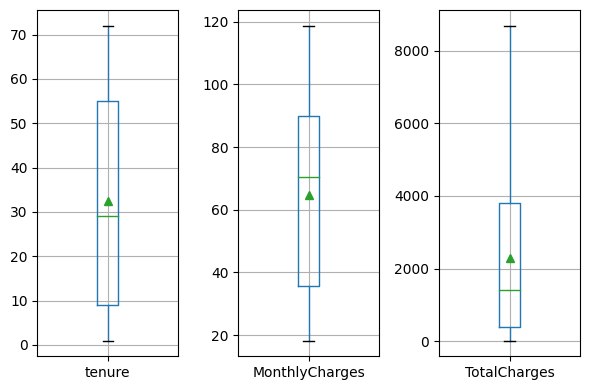

In [ ]:
#show boxplot visualitation for all numeric variabel
plt.figure(figsize=(6,4)) #make a figure to boxplot place with size that needed. In this case wide=6 and long=4
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'. 
    plt.subplot(1, 3, i+1) #make subplot in figure with size that needed. In this case 1 row 3 colums because there are 3 variabels.
    df.boxplot(column=nums[i], vert=True, showmeans=True) #show boxplot for each variabel to become 'y' with vertical oriented.
    plt.tight_layout() #make visualitation to good image if downloaded

Based on the boxplot output above, it is known that:
- There are no outliers for each variabels.
- All variabels have not normal distribution.
- `tenure` variabel has a rigth skewness distribution because has upper whisker longer than lower whisker or has mean value higher than median value.
- `MonthlyCharges` variabel has a left skewness distribution because has upper whisker shorter than lower whisker or has mean value smaller than median value.
- `TotalCharges` variabel has a rigth skewness distribution because has upper whisker longer than lower whisker or has mean value higher than median value.

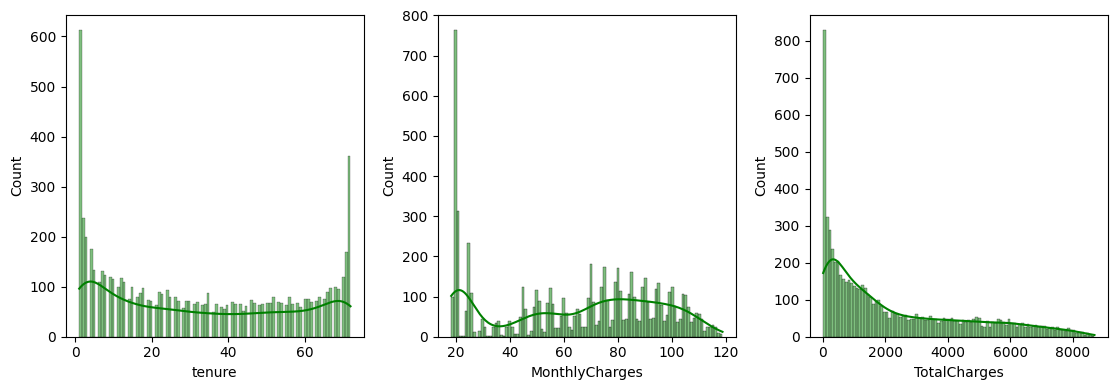

In [ ]:
#show histplot visualitation for all numeric variabel
plt.figure(figsize=(15, 4)) #make a figure to histplot place with size that needed. In this case wide=15 and long=4
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'.
    plt.subplot(1, 4, i+1) #make subplot in figure with size that needed. In this case 1 row 3 colums because there are 3 variabels.
    sns.histplot(df[nums[i]], color='green', kde=True, bins = 100) #show histplot for each variabel  with green color, size bar=100, and shown the line.
    plt.tight_layout() #make visualitation to good image if downloaded

Based on the output above, it is known that:
- Distribution for all variables are not normal.
- `tenure` variabel seen has a bimodal distribution.
- `MonthlyCharges` variabel seen tend has a bimodal distribution.
- `TotalCharges` variabel seen has a rigth skewnees unimodal distribution.
- Common unique/values in the `tenure` has long far so make a two different groups being lumped together. So, That is make a bimodal distribution. 
- Common unique/values in the `MonthlyCharges` has long far so make a two different groups being lumped together. So, That is make a bimodal distribution. 

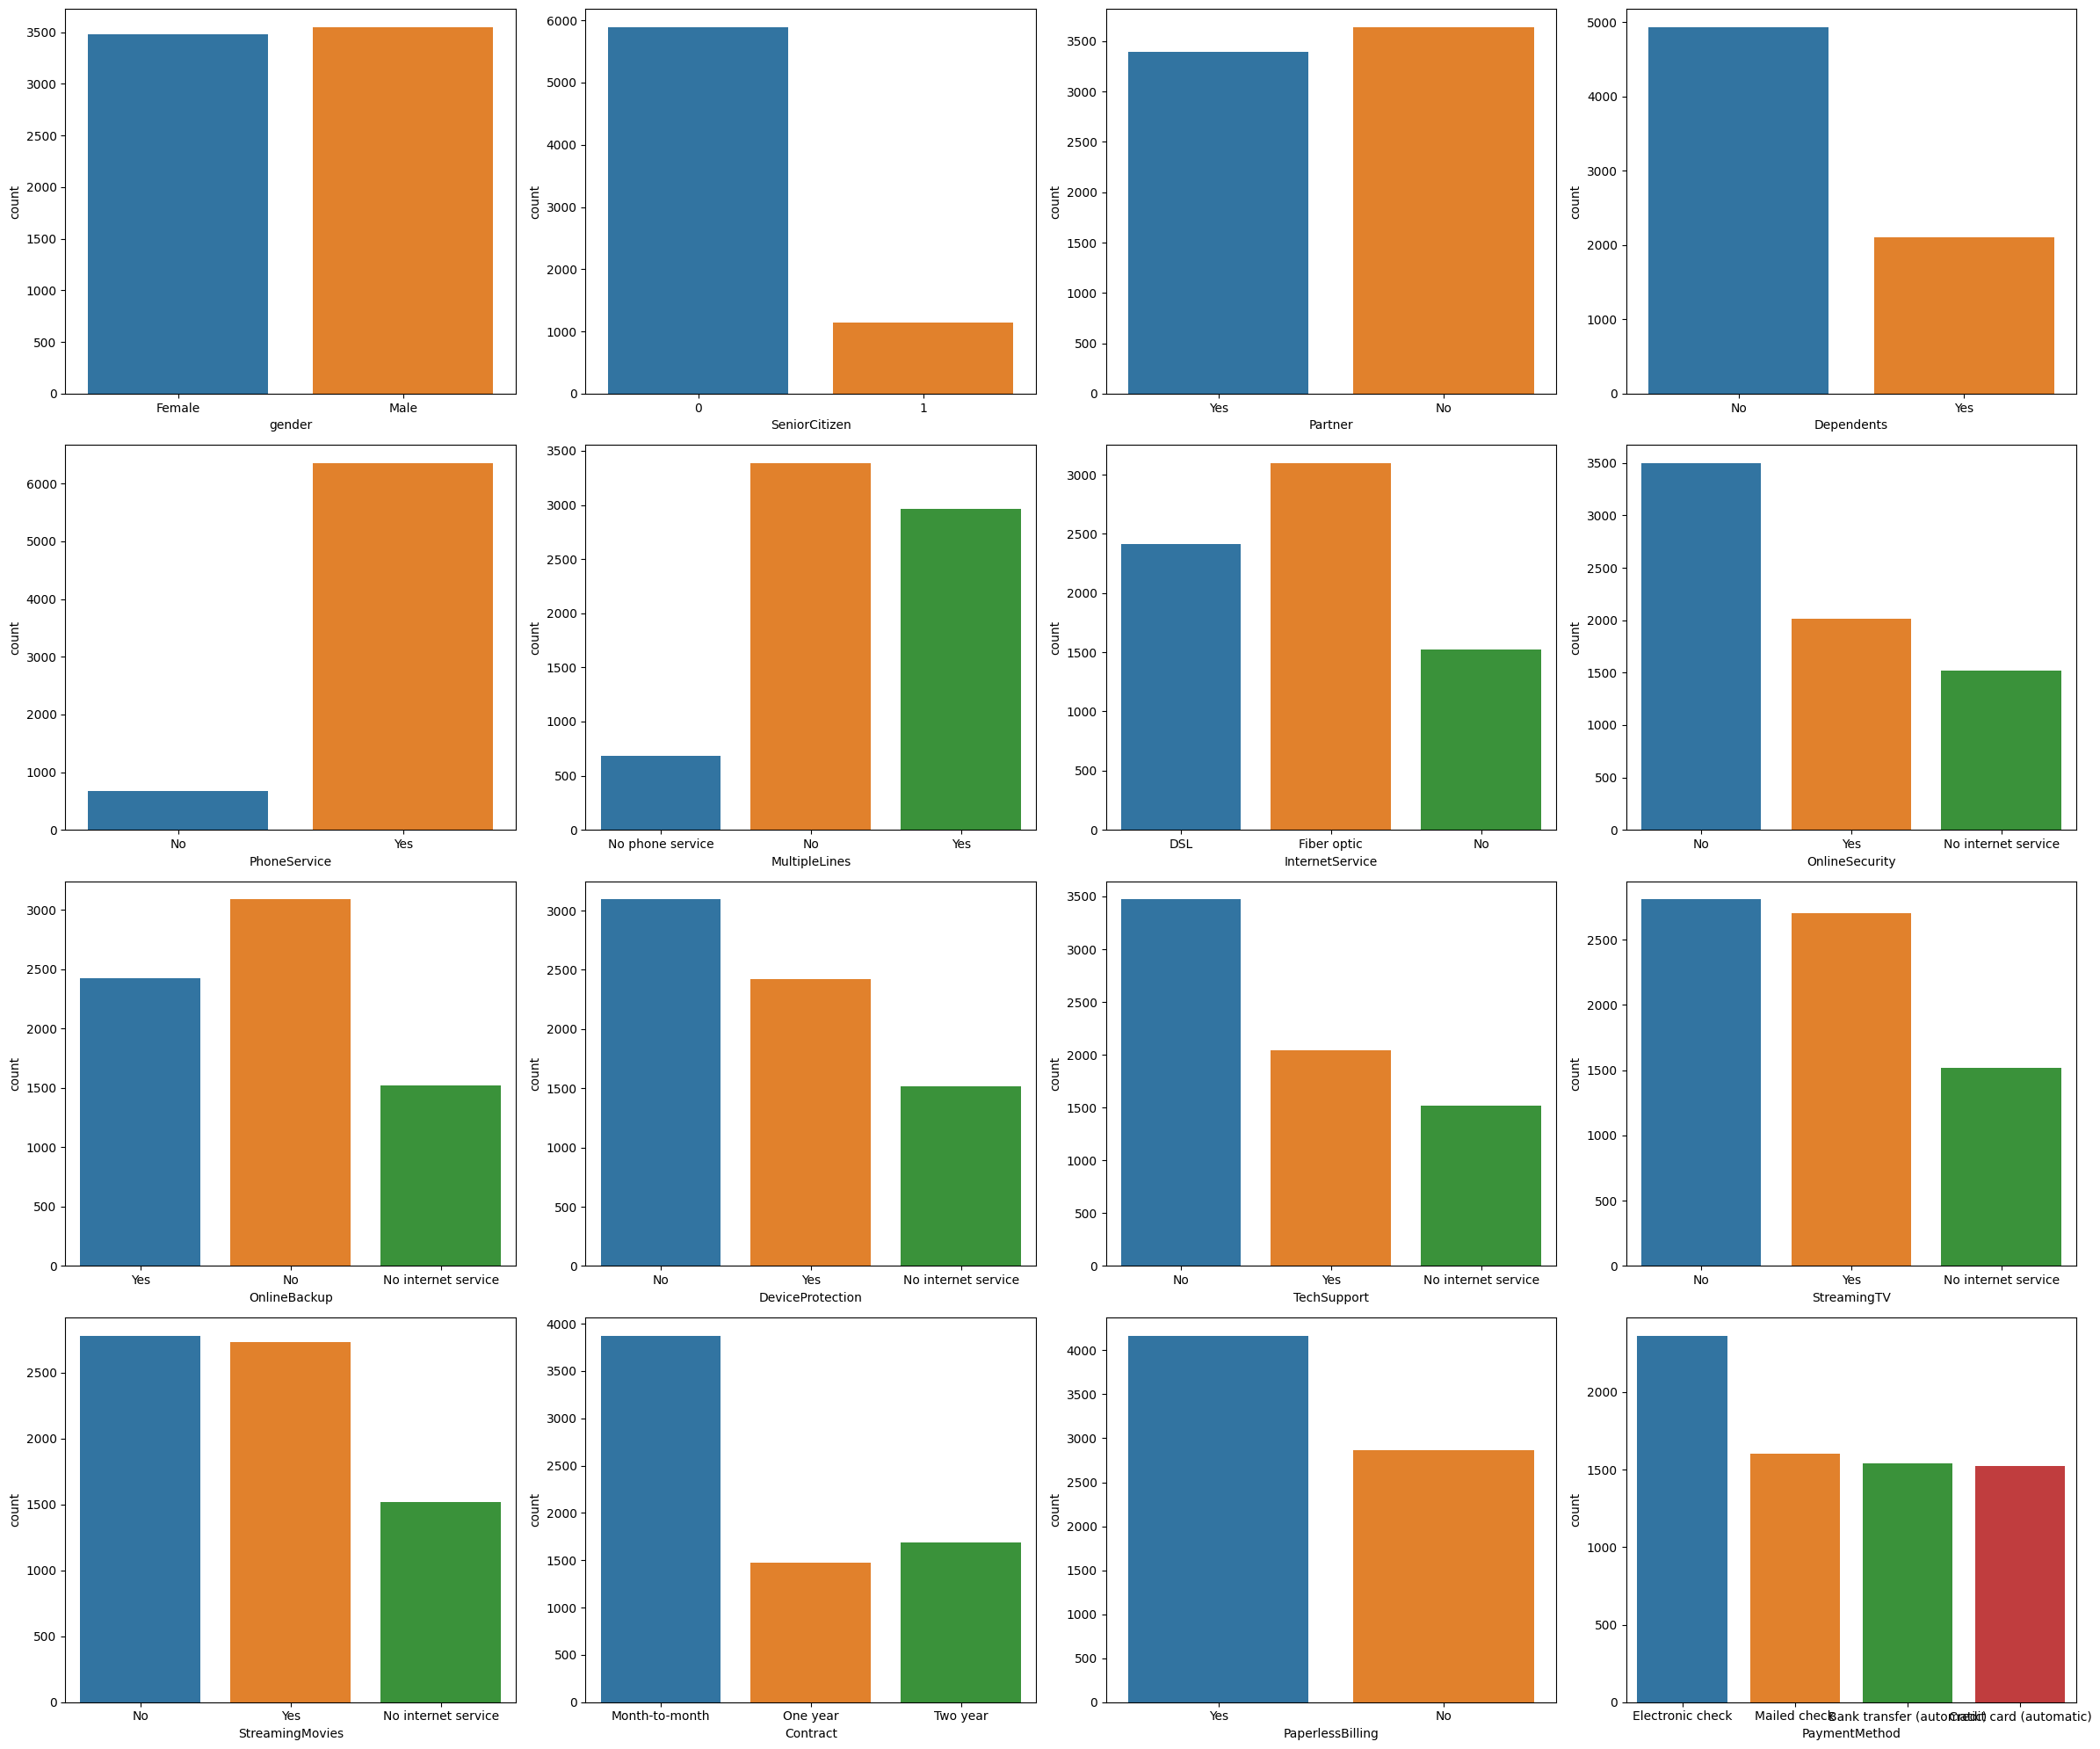

In [ ]:
#show countplot visualitation for all categoric variabel
plt.figure(figsize=(24, 20)) #make a figure to histplot place with size that needed. In this case wide=24 and long=20
for i in range(0, len(cats)): #looping according to count of variabel of 'cats'.
    plt.subplot(4, 4, i+1) #make subplot in figure with size that needed. In this case 4 row 4 colums because there are 16 variabels.
    sns.countplot(x = df[cats[i]])#show countplot for each variabel.
    plt.tight_layout()  #make visualitation to good image if downloaded

Based on the output above, it is known that:
There is an imbalance in distribution between categories in the `SeniorCitizen`, `Dependents`, `PhoneService`, and `MultipleLines` variables which can cause the accuracy of machine learning to be low.

## 5.Bivariate Analysis
In Bivariate Analysis, We use `Boxplot` visualitation for `Numeric` variabel analysis and `Countplot` visualitation for `Categorical` variabel.

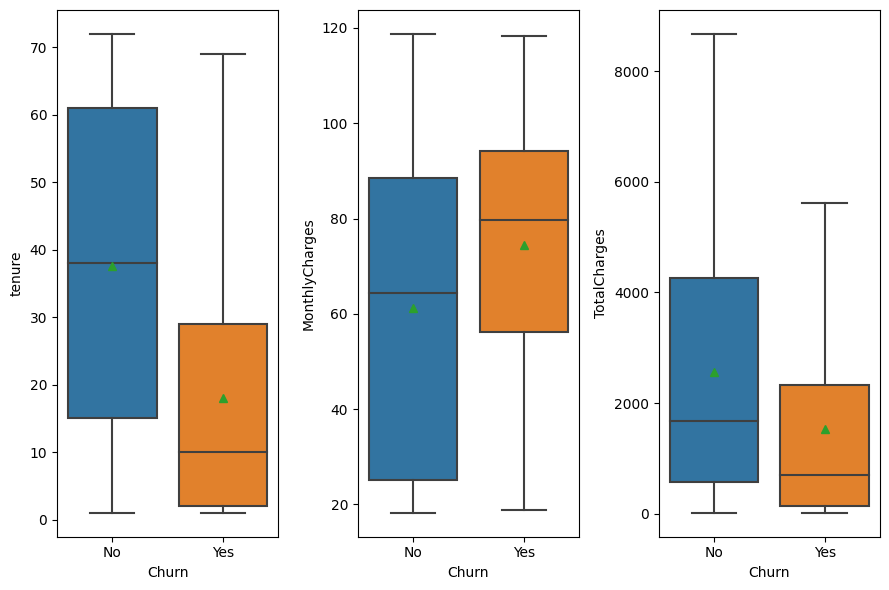

In [ ]:
#show boxplot visualitation by 'Churn' for all numeric variabel
plt.figure(figsize=(9,6)) #make a figure to boxplot place with size that needed. In this case wide=9 and long=6
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'. 
    plt.subplot(1, 3, i+1) #make subplot in figure with size that needed. In this case 1 row 3 colums because there are 3 variabels.
    sns.boxplot(y = df[nums[i]], x = df['Churn'], orient = 'v', showfliers = False, showmeans=True) #show boxplot by 'Churn' for each variabel to become 'y' with vertical oriented.
    plt.tight_layout() #make visualitation to good image if downloaded

Based on the output above, it is known that:
- Based on the `tenure` by `Churn` boxplot, Churn customers are mostly customers with short tenure.
- Based on the `MonthlyCharges` by `Churn` boxplot, Churn customers have slightly higher Monthly Charges on average than non-churn customers.

Based on the 2 insights above, this could be a business opportunity, for example offering lower Monthly Charges if you take a longer tenure.

- Based on the `TotalCharges` by `Churn` boxplot, Churn or non Churn customers have the same trend of TotalCharges however Churn customers have slightly lower Total Charges on average than non Churn customers. This might happen because customers who have a short tenure, of course, have a short payment period.

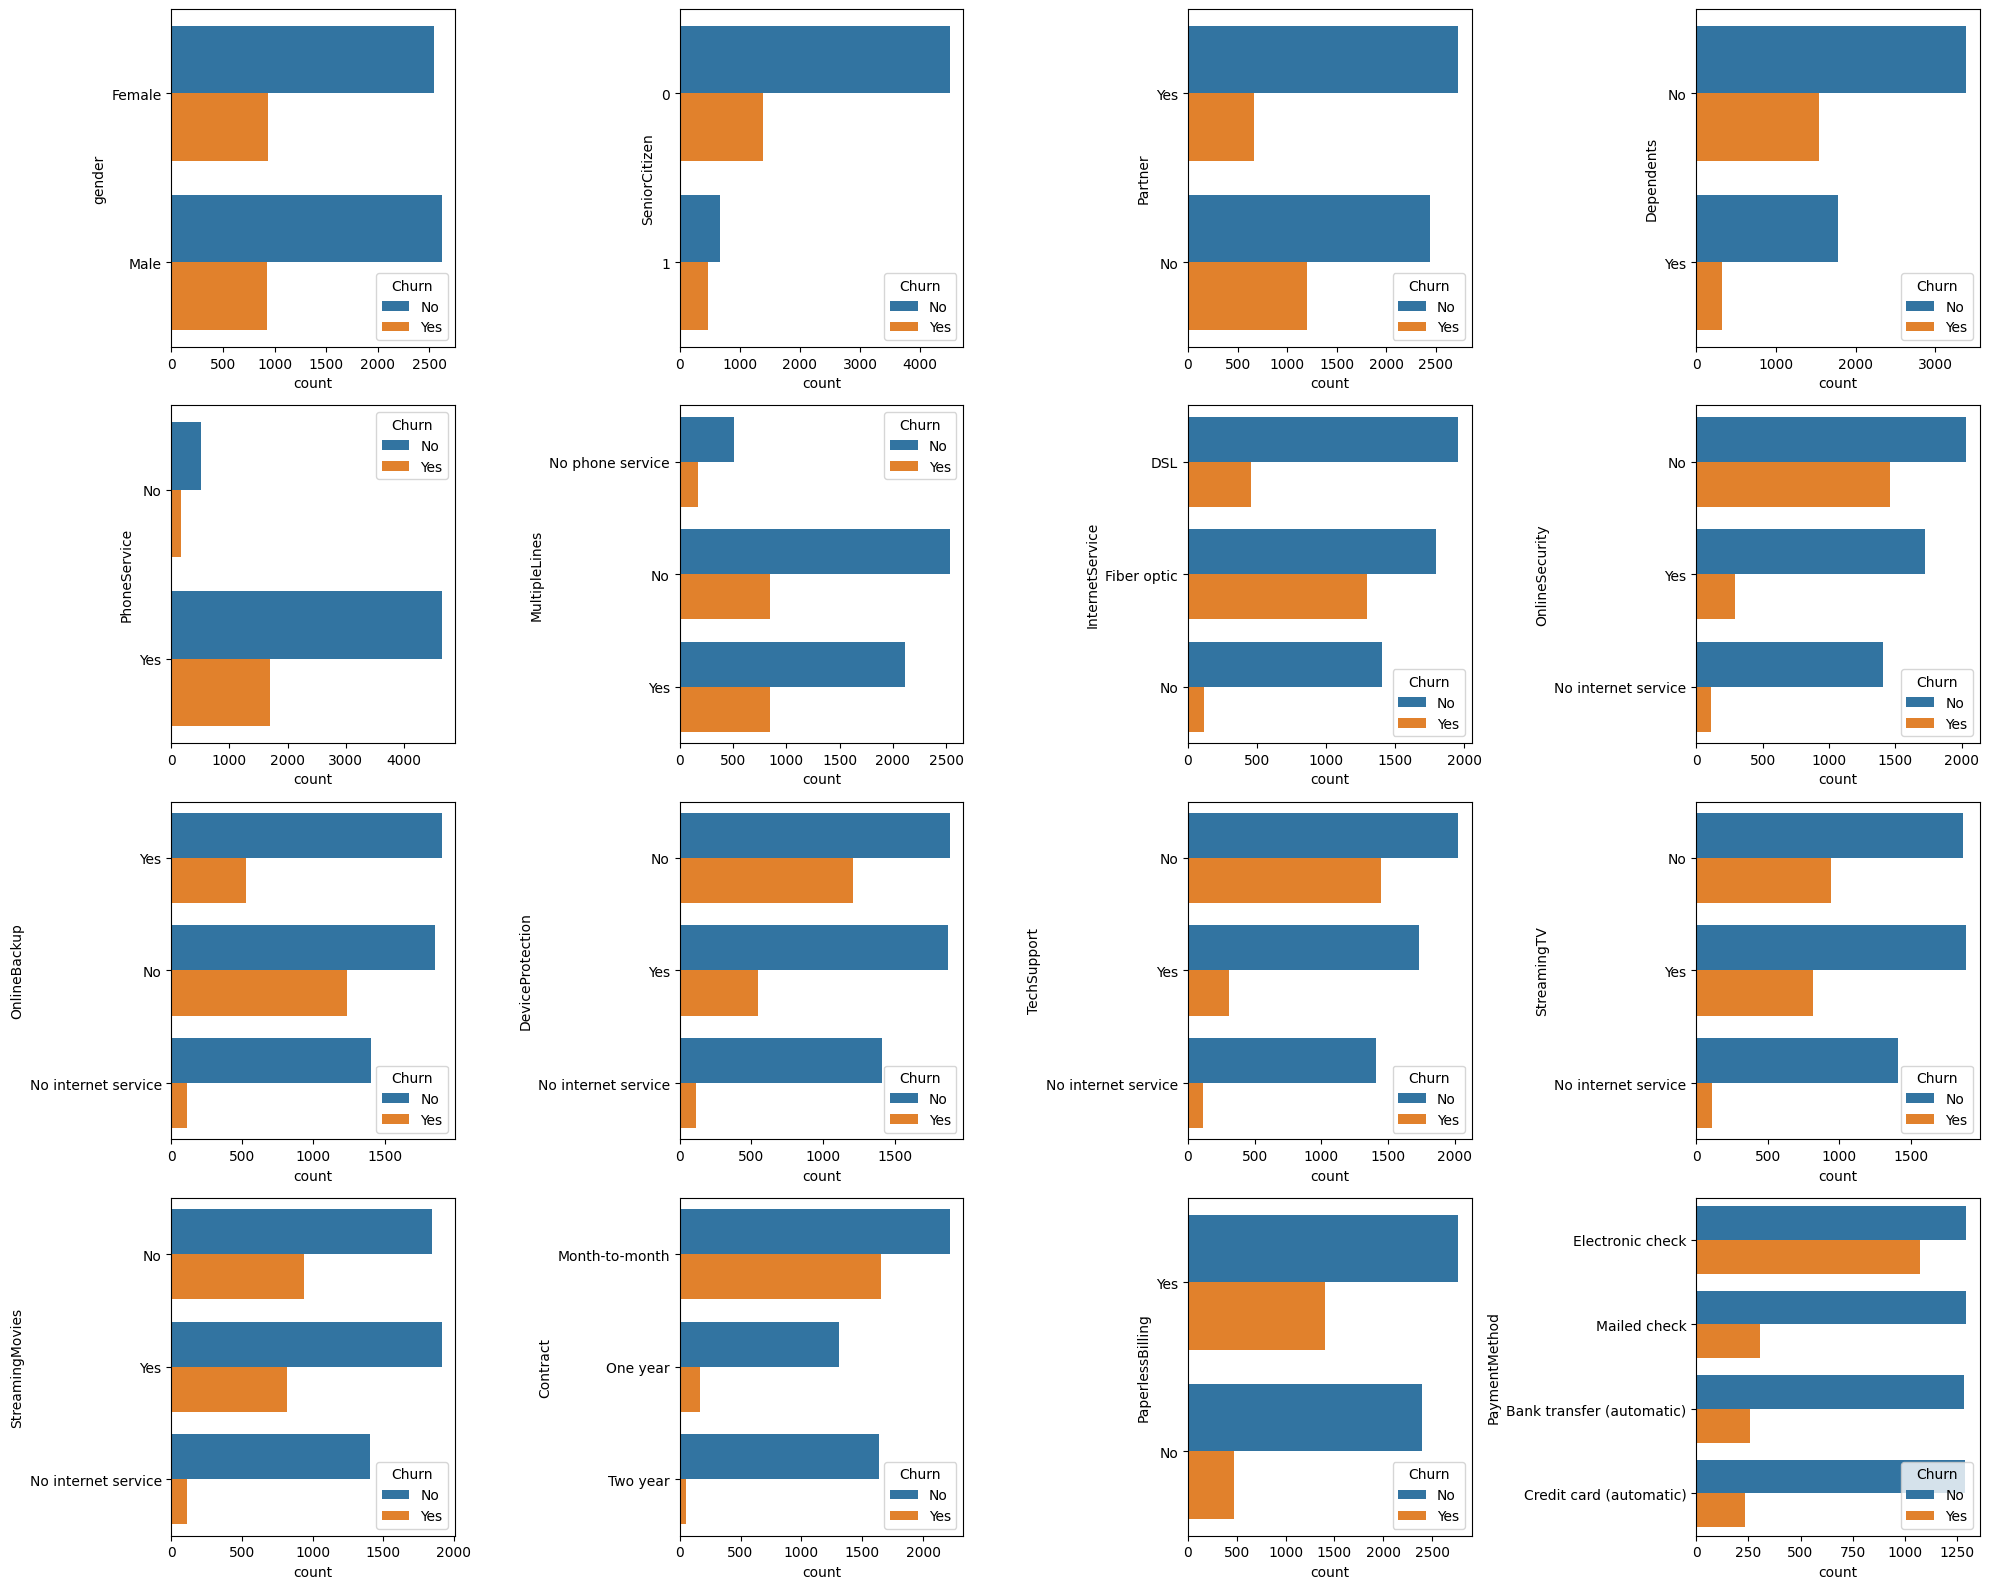

In [ ]:
#show countplot y 'Churn' visualitation for all categoric variabel
plt.figure(figsize=(20, 16)) #make a figure to histplot place with size that needed. In this case wide=24 and long=20
for i in range(0, len(cats)): #looping according to count of variabel of 'cats'.
    plt.subplot(4, 4, i+1) #make subplot in figure with size that needed. In this case 4 row 4 colums because there are 16 variabels.
    sns.countplot(y = df[cats[i]], hue = df['Churn'])#show countplot by 'Churn' for each variabel.
    plt.tight_layout()  #make visualitation to good image if downloaded

Based on the output above it is known that:
- Based on the countplot by Churn variable `SeniorCitizen`, a high percentage of customers who do not churn are in the `0` category or customers under 65 years of age.
- Based on the countplot by Churn variable `Partner`, a high percentage of customers who do not churn are in the `Yes` category or have a partner.
- Based on the countplot by Churn variable `Dependents`, a high percentage of customers who do not churn are in the `Yes` category or have relatives/family members.
- Based on the countplot by Churn variable `Contract`, a high percentage of customers who do not churn are customers with a long `tenure`.
- Based on the countplot by Churn variable `PaperlessBilling`, a high percentage of non-churn customers is in the `No` category. This may mean that most of the non-churn customers are companies/workplaces.

Based on the 5 conclusions above, it can become information on business opportunities, for example, product offerings are focused on targeting young companies/consumers who are not alone or have family members who use the product together, with a minimum 1-year contract offer.

- Based on the countplot by Churn variable `InternetService`, there is a high percentage of churn customers in the `Fiber Optic` category. This can be information that there may be improvements to the `Fiber Optic` InternetService so as to increase customer satisfaction.
- Based on the countplot by Churn variables `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` and `TechSupport` a high percentage of non-churned customers are in the `yes` category. This information can be used as a business opportunity for example making `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` and `TechSupport` as superior products that can be offered to customers.

Other variables not mentioned in the conclusion have the same Churn/non-Churn tendency between categories, so that means it can be said to have no effect on the 'Churn' variable.

## 6.Multivariate Analysis
In Multivariate Analysis, we use Pearson's correlation to determine the relationship between variables in the dataframe. Pearson correlation can only work on numeric variables, so categorical data variables need to be converted to numeric first.

<Axes: >

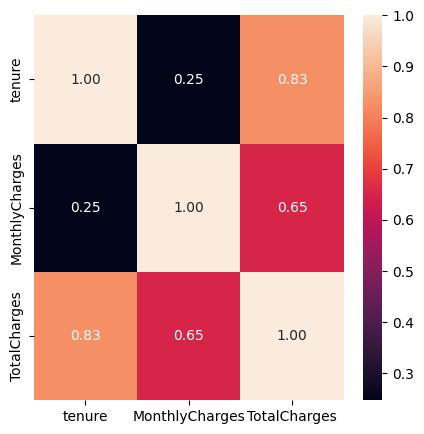

In [ ]:
#show corellation all variabel in dataframe 'df'
plt.figure(figsize = (5, 5))
sns.heatmap(df.corr(), annot = True, fmt=".2f")

Based on the output above, it is known that:
- The `TotalCharges` variable has a significant positif correlation with the `tenure` variabel of 0,83 and `MonthlyCharges` variable of 0,65.
- `MonthlyCharges` variable has no significant positif correlation with `tenure` variable. These results are slightly different from the conclusions in the bivariate analysis that has been done.

But on the output above, only variables of numeric type can show the level of correlation. So it is necessary to do `Categorical Data Encoding` to change the categorical data in the `df` dataframe to be numeric.

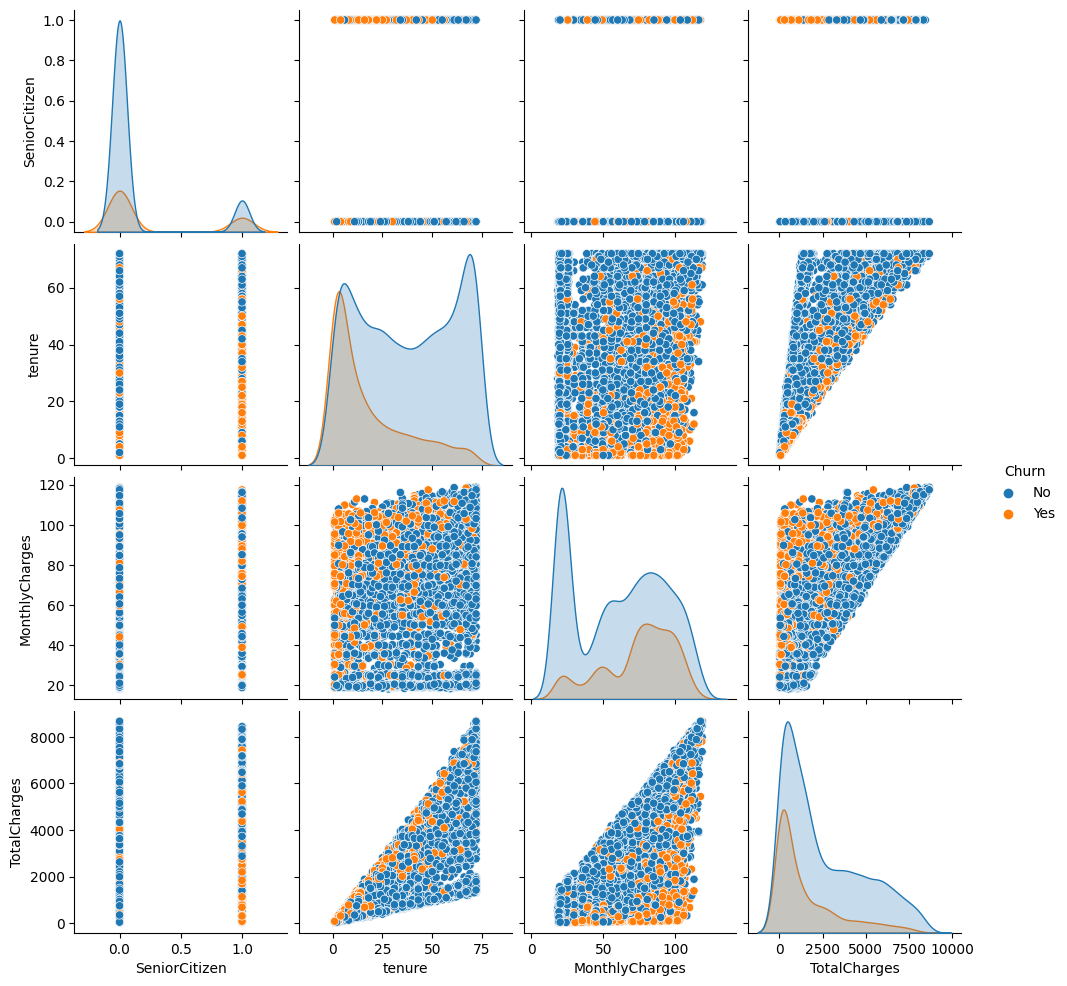

In [ ]:
#show corellation numerical variabel in dataframe 'df'
sns.pairplot(df, diag_kind='kde', hue='Churn')

Based on the output above, it can be seen that there is a grouping pattern in the plot which shows customers who are `Churn_Yes` even though they are not completely separated from the other `Churn_No` groups. This means that the data is good enough to be analyzed in the hope of good machine learning accuracy.

In [ ]:
#get dummies to transform data (Categorical Data Encoding Onehot method)
df2=pd.get_dummies(df,drop_first=True)
df2.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


Based on the output above, it is known that all variabels have become numeric variabels in `df2`.

<Axes: >

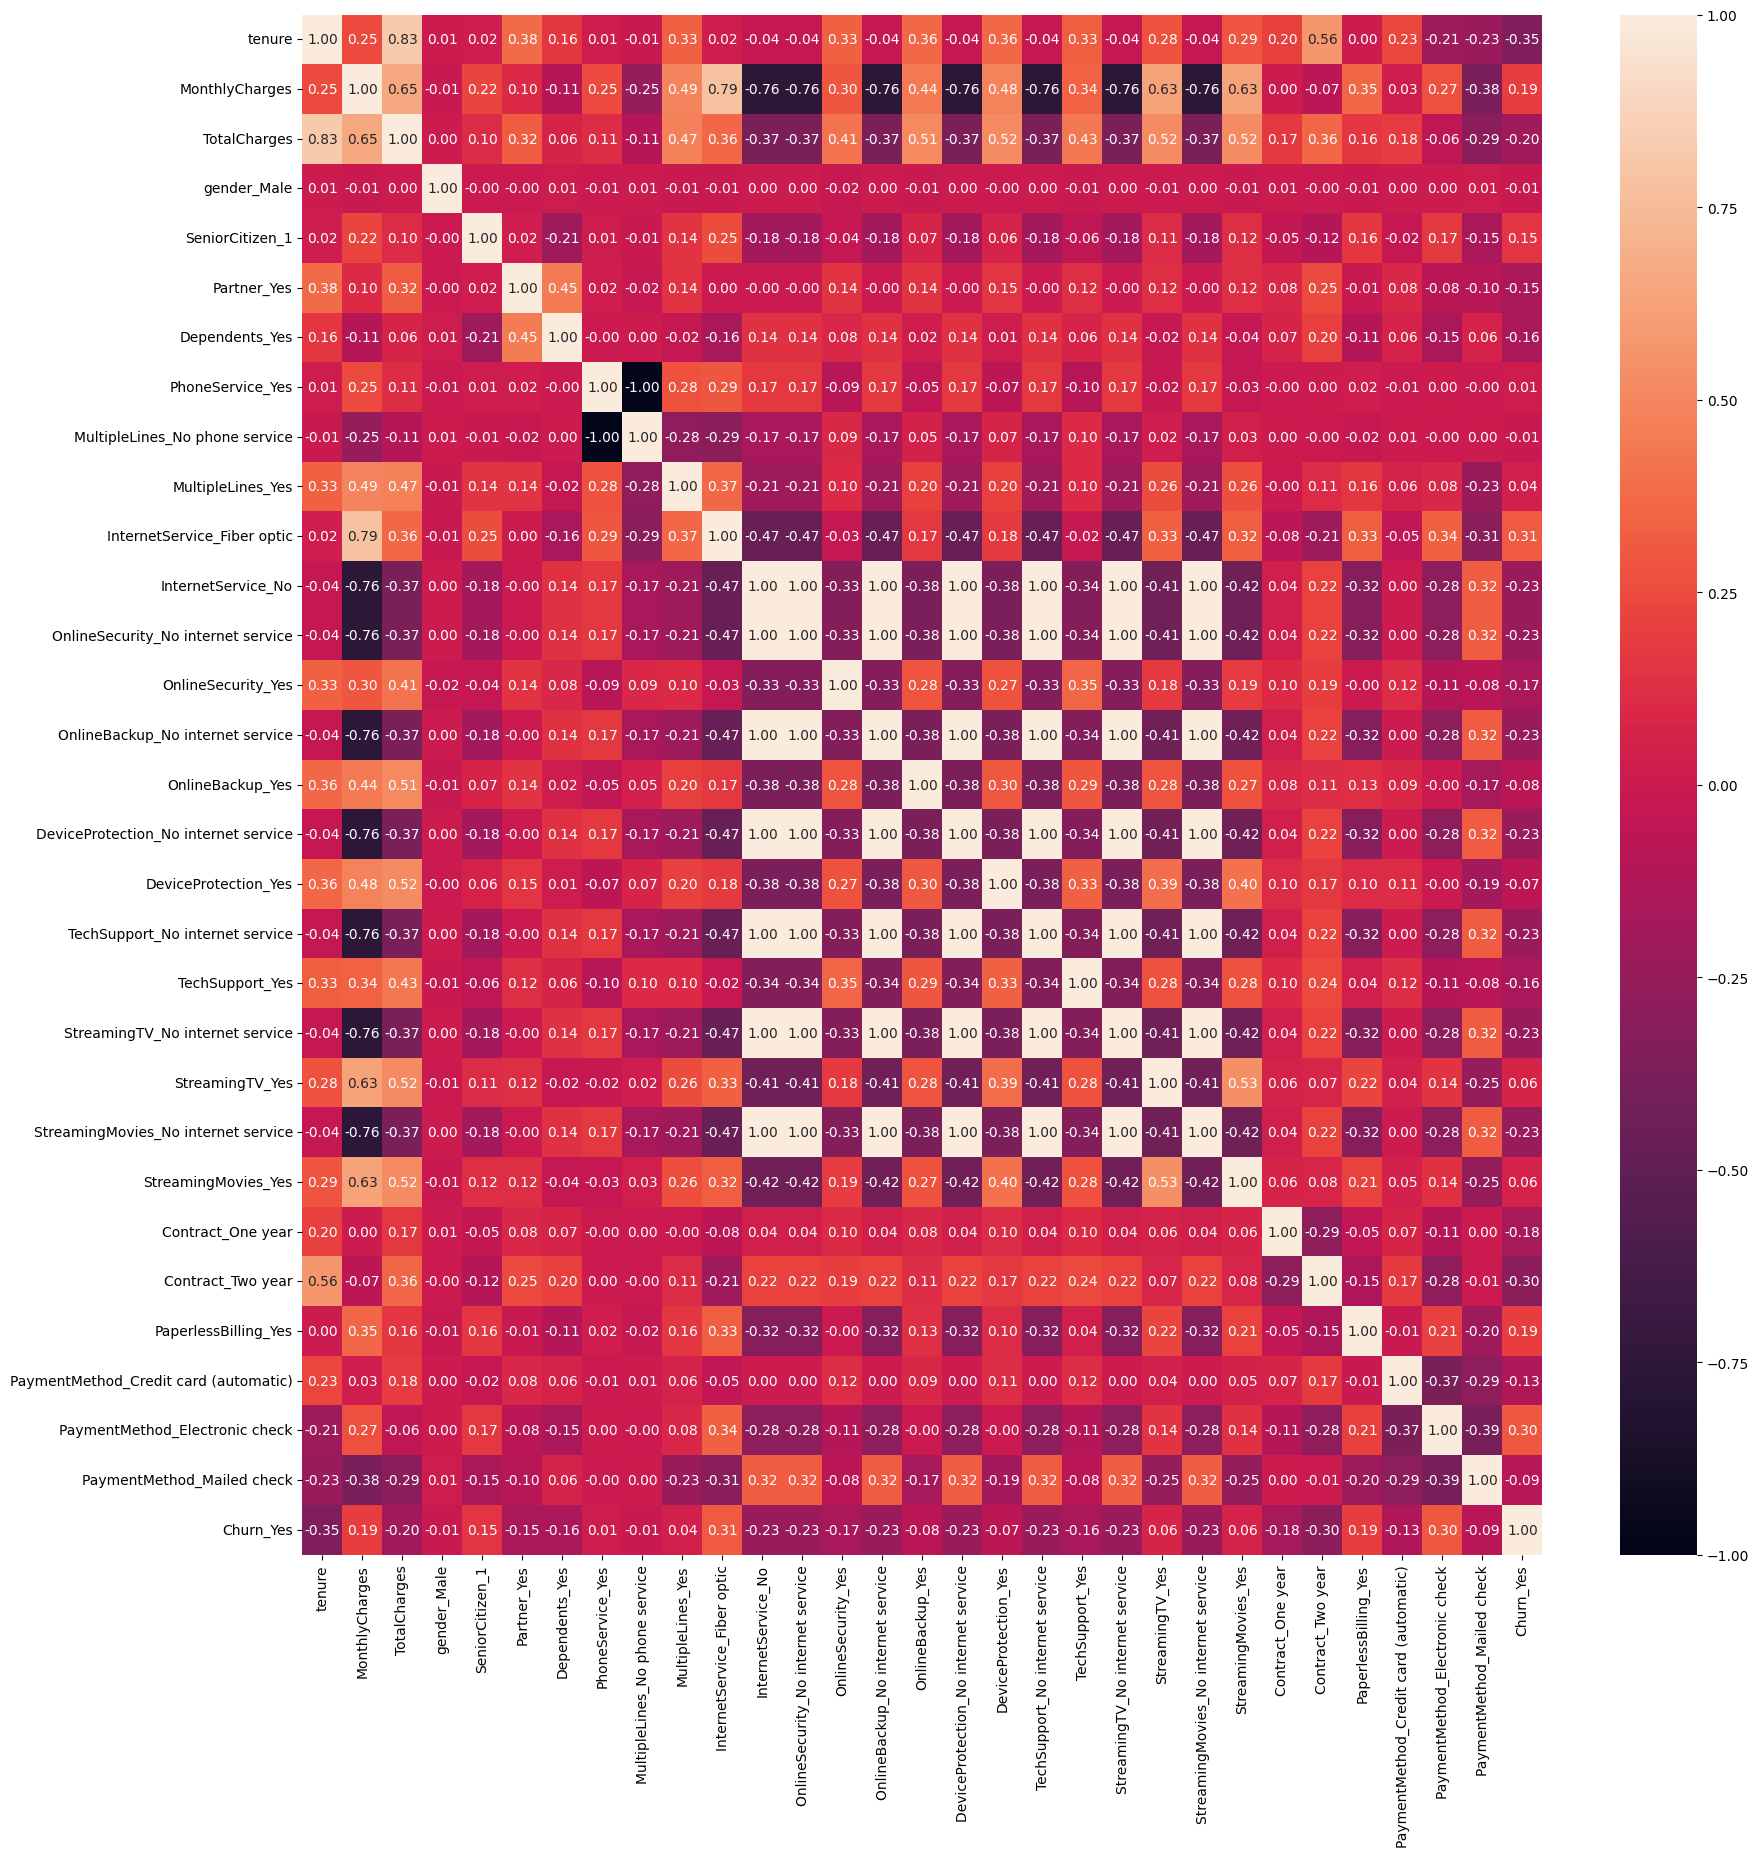

In [ ]:
#show corellation all variabel in dataframe 'df2'
plt.figure(figsize = (20, 20))
sns.heatmap(df2.corr(), annot = True, fmt=".2f")

Based on the output above, you can see the correlation values ​​between the variables in the dataframe. When focusing on the target variable `Churn`, it can be seen that the `Churn` variable has a positive correlation with the `MonthlyCharges`, `SeniorCitizen`, `PhoneService`, `Multiplelines`,`InternetService_FiberOptic`, `StremingTV`, `StreamingMovie`, `PaperlessBilling_Yes` and `PaymentMethod_Electronic check` but not significant.

In [ ]:
#show correlation all variabel by 'Churn = Yes' as a dataframe
df3=df2.corr()['Churn_Yes'].sort_values().reset_index()
df3

,index,Churn_Yes
0,tenure,-0.354049
1,Contract_Two year,-0.301552
2,OnlineBackup_No internet service,-0.227578
3,OnlineSecurity_No internet service,-0.227578
4,InternetService_No,-0.227578
5,TechSupport_No internet service,-0.227578
6,StreamingMovies_No internet service,-0.227578
7,StreamingTV_No internet service,-0.227578
8,DeviceProtection_No internet service,-0.227578
9,TotalCharges,-0.199484


Based on the output above, it is known that the `Churn` variable has a positive correlation with the `MonthlyCharges`, `SeniorCitizen`, `PhoneService`, `Multiplelines`,`InternetService_FiberOptic`, `StremingTV`, `StreamingMovie`, `PaperlessBilling_Yes` and `PaymentMethod_Electronic check` but not significant.

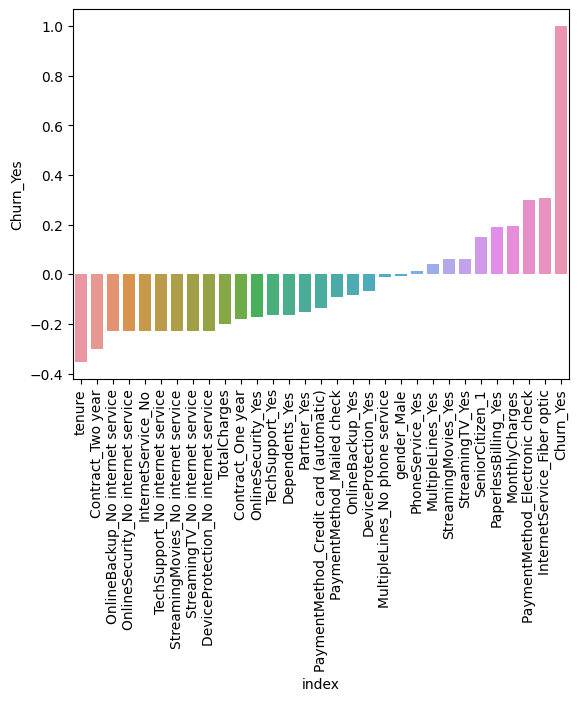

In [ ]:
#show correlation all variabel by 'Churn = Yes' as a barplot
chart = sns.barplot(data=df3,x="index",y="Churn_Yes")
for item in chart.get_xticklabels():
  item.set_rotation(90)

Based on the output above, it can be seen that the `Churn` variable has a positive correlation with the `MonthlyCharges`, `SeniorCitizen`, `PhoneService`, `Multiplelines`,`InternetService_FiberOptic`, `StremingTV`, `StreamingMovie`, `PaperlessBilling_Yes` and `PaymentMethod_Electronic check` but not significant.